In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\Dell\Documents\python\ML\ML marks predictor\student_info.csv",encoding="latin-1")

In [3]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [4]:
df.tail()

,study_hours,student_marks
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


In [5]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


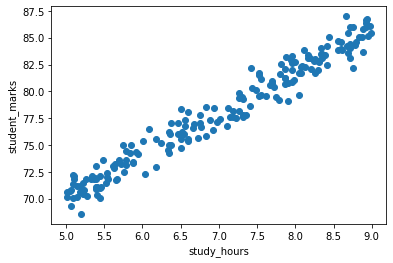

In [6]:
plt.scatter(x = df.study_hours, y = df.student_marks)
plt.xlabel("study_hours")
plt.ylabel("student_marks")
plt.show()

# prepare the data for modelling

In [7]:
df["study_hours"].value_counts()

5.39    4
5.22    3
7.31    3
5.09    3
7.95    3
       ..
5.55    1
5.01    1
8.92    1
6.67    1
8.33    1
Name: study_hours, Length: 144, dtype: int64

In [8]:
df['student_marks'].value_counts()

83.08    3
73.61    2
72.08    2
77.07    2
81.70    2
        ..
69.27    1
72.22    1
77.01    1
79.87    1
78.50    1
Name: student_marks, Length: 192, dtype: int64

In [9]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [10]:
DF = df.fillna(df.mean())

In [11]:
DF.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

<AxesSubplot:title={'center':'study_hours'}>

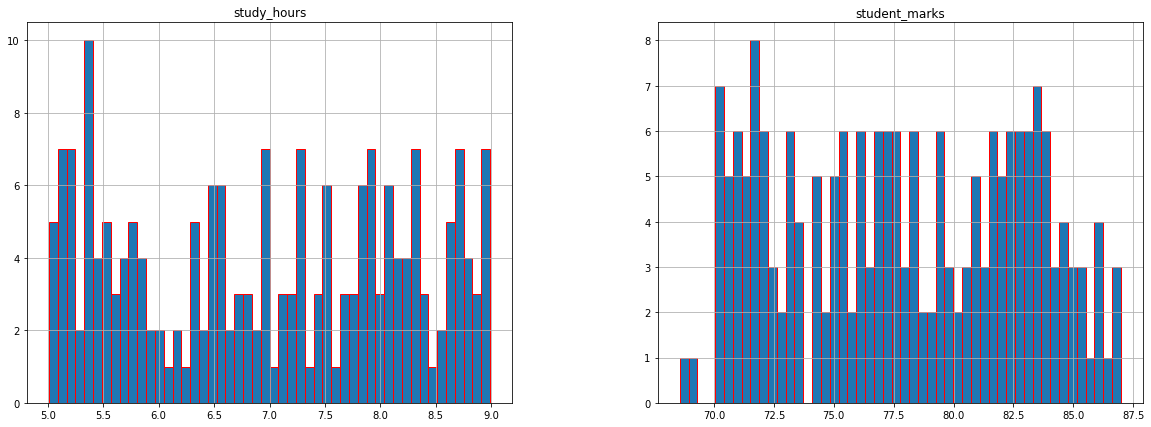

In [12]:
DF.hist(bins=50,figsize=(20,7),ec='r')[0][0]

In [13]:
#split dataset into traing and testing

In [14]:
x = DF.drop("student_marks", axis="columns")
y = DF.drop("study_hours", axis="columns")

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=52)

In [17]:
y_train.shape

(150, 1)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lr = LinearRegression()

In [20]:
lr.fit(x_train,y_train,sample_weight=10)

LinearRegression()

In [21]:
lr.coef_[0][0].round(2)

3.97

In [22]:
lr.intercept_[0].round(2)

50.18

In [23]:
y_pred = lr.predict(x_test)

In [24]:
y_pred

array([[76.38447201],
       [75.39197941],
       [77.2975652 ],
       [78.44885662],
       [78.88555336],
       [73.40699421],
       [79.00465248],
       [85.63450305],
       [71.06471167],
       [73.00999717],
       [85.71390245],
       [82.73642465],
       [70.07221907],
       [76.90056816],
       [85.43600453],
       [73.16879599],
       [71.14411108],
       [81.54543353],
       [82.97462288],
       [72.69239954],
       [76.02717467],
       [83.13342169],
       [72.57330043],
       [75.47137882],
       [80.71173975],
       [70.78681375],
       [72.89089806],
       [70.46921611],
       [73.16879599],
       [72.09690398],
       [70.3104173 ],
       [71.97780487],
       [74.35978711],
       [79.36194981],
       [82.93492317],
       [77.9563767 ],
       [73.36729451],
       [77.9563767 ],
       [85.39630482],
       [84.76110956],
       [80.07654448],
       [81.10873679],
       [70.3104173 ],
       [82.2600282 ],
       [71.62050753],
       [73

In [42]:
from sklearn import metrics
root_mean_square_error = np.sqrt(metrics.mean_squared_error(y_test,y_pred))

In [43]:
root_mean_square_error

1.078022335585781

In [25]:
newDF = pd.DataFrame(np.c_[x_test,y_test,y_pred], columns = ["X","Y","Z"])`

In [26]:
newDF.head()

,X,Y,Z
0,6.60,75.55,76.384472
1,6.35,76.19,75.391979
2,6.83,75.80,77.297565
3,7.12,78.42,78.448857
4,7.23,77.55,78.885553


# Graph between Actual and Predicted Value

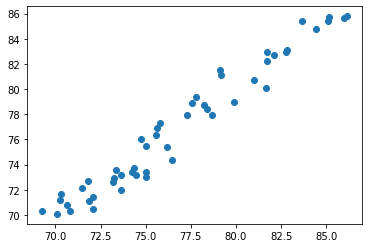

In [27]:
plt.scatter(x = newDF.Y, y=newDF.Z)
plt.show()

# Fine-Tune Model

In [28]:
lr.score(x_test,y_test)

0.9476687023606281

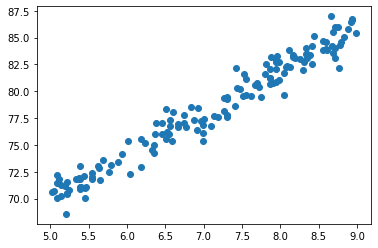

In [29]:
plt.scatter(x_train,y_train)
plt.show()

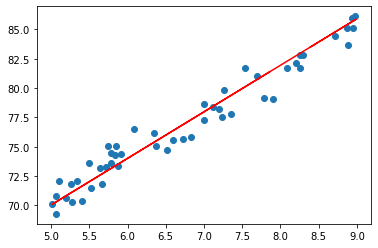

In [30]:
plt.scatter(x_test,y_test)
plt.plot(x_train,lr.predict(x_train),color="r")
plt.show()

# Presenting Solution


In [31]:
import joblib

In [32]:
joblib.dump(lr,"lr_model.pkl")

['lr_model.pkl']

In [33]:
model = joblib.load("lr_model.pkl")

In [34]:
model.predict([[6]])[0][0]

74.00248977041184